### WOMEN'S AFROBASKET FINAL 2021
<b>A shot-based data entry and analysis project done by [fesomadealli](https://github.com/fesomadealli) on D'Tigresss 3 peat Afrobasket success in Cameroon 2021.<b>

Why are we doing this?
- Check if our data entry was spot on
- Practice Sport Analytics
- Couldn't lay on hand on proper dataset
- Plot Shot Maps
- See to what extent, we could get similarities with the published stats on FIBA's website

In [72]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
# #uncommon to view all rows in our df
# pd.set_option('display.max_rows', None)
# # to reset the view all rows option use this:
# # pd.reset_option('display.max_rows')

##### There are many ways to do this. The easiest is to just move the files into one working directory but I just wanted to play around with glob (partly cause I like how funny it sounds when pronounced)

In [74]:
root_dir = 'C:/Users/Admin/Downloads/Stat Zone/jupyternotebookfiles//my-data-projects/'
globs = glob.glob(root_dir + '**/*afrobasket*.csv', recursive=True)
globs

['C:/Users/Admin/Downloads/Stat Zone/jupyternotebookfiles//my-data-projects\\Datasets\\fiba-afrobasket-ngr\\FIBA_Womens _Afrobasket_Final_2021 - TEAM ROASTER (NGR).csv',
 'C:/Users/Admin/Downloads/Stat Zone/jupyternotebookfiles//my-data-projects\\Datasets\\fiba-afrobasket-ngr\\WOMENS_AFROBASKET_SHOTLOG_POS_DATA_2021.csv',
 'C:/Users/Admin/Downloads/Stat Zone/jupyternotebookfiles//my-data-projects\\Datasets\\fiba-afrobasket-ngr\\WOMENS_AFROBASKET_SHOTLOG_SUPPORT_DATA_2021.csv']

##### I have already seen the content of the 'globs' list from the print statement so this next block of code is based on pre-gathered info.

In [75]:
for num, csv in enumerate(globs):
    if num == 0: #python starts counting from 0
        ngr_roster = pd.read_csv(csv)
        ngr_roster_copy = ngr_roster.copy()
        ngr_roster
    elif num == 1: #python starts counting from 1
        shotlog_pos_data = pd.read_csv(csv)
        shotlog_pos_data_copy = shotlog_pos_data.copy()
        shotlog_pos_data
    else:
        shotlog_support_data = pd.read_csv(csv)
        shotlog_support_data_copy = shotlog_support_data.copy()
        shotlog_support_data

,SQUAD_NO,PLAYER_NAME,POSITION,CLUB_SIDE,DATE_OF_BIRTH,AGE,HEIGHT(cm),HEIGHT(ft-in),NATIONALITY,MLI,STATE,ORIGIN,PLACE_OF_BIRTH,AVG_HEIGHT (cm),AVG_HEIGHT (ft-in),AVG_AGE
0,0,Amy OKONKWO,forward,CD Zamarat,26/08/1996,26.0,188.0,"6'2""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
1,3,Pallas KUNAIYI-AKPANAH,center,Basket Namur Capitale,12/07/1997,25.0,188.0,"6'2""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
2,7,Sarah OGOKE,shooting guard,Ferroviario Maputo,25/06/1990,32.0,175.0,"5'9""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
3,10,Promise AMUKAMARA,point guard,Charnay Basket Bourgogne SUD,22/06/1993\r,29.0,175.0,"5'9""",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
4,11,Adaora ELONU,forward,Spar Girona,28/04/1990\r,32.0,185.0,"6'1""",Nigerian,starting-5,NaN,NaN,NaN,184.0,"6'0""",28.0
5,12,Nkem AKARAIWE,forward,CB Andratx,22/12/1996\r,26.0,183.0,"6'0""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
6,20,Murjanatu MUSA,forward,Air Warrior Basketball Club,05/05/2000,22.0,187.0,"6'2""",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
7,22,Oderah CHIDOM,center,Angers\r,09/07/1995,27.0,193.0,"6'4""",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
8,23,Ezinne KALU,point guard,Landerneau Bretagne Basket,26/06/1992,30.0,173.0,"5'8""",Nigerian,starting-5,NaN,NaN,NaN,184.0,"6'0""",28.0
9,25,Victoria MACAULAY,center,Bursa Uludag Basketbol,07/08/1990,32.0,193.0,"6'4""\r",Nigerian,starting-5,NaN,NaN,NaN,184.0,"6'0""",28.0


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,NGR,22,Shot,11,8,12,36,-,-
1,OPP,MLI,Shot,11,8,79,92,-,-
2,NGR,23,Shot,11,27,13,34,-,-
3,NGR,25,Shot,11,38,16,92,-,-
4,OPP,MLI,Shot,11,38,92,86,-,-
...,...,...,...,...,...,...,...,...,...
158,OPP,MLI,Shot,104,36,13,6,-,-
159,OPP,MLI,Shot,104,36,23,89,-,-
160,NGR,7,Shot,104,36,83,3,-,-
161,NGR,10,Shot,104,36,88,33,-,-


,shoot_player_jer_num,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
1,MLI,MLI,miss,3s,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2022,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,MLI,MLI,miss,3s,0,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2178,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
158,MLI,MLI,miss,3s,0,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2179,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
159,7,NGR,miss,3s,0,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2180,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
160,10,NGR,miss,in-arc,0,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2181,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


#### Fixing Potential Issues With Datasets:
- unequal length of dataframes (already suggesting erroneuos data entry): 163 rows of pos-data and 162 rows of support-data
- no metadata but columns names are descriptive enough


In [76]:
shotlog_pos_data.shape
shotlog_pos_data.describe()

(163, 9)

,Mins,Secs,X,Y
count,163.000000,163.000000,163.000000,163.000000
mean,30.067485,20.269939,48.699387,48.092025
std,39.787418,18.886948,36.272823,21.328069
min,0.000000,0.000000,5.000000,3.000000
25%,0.000000,3.000000,13.000000,39.500000
50%,11.000000,3.000000,29.000000,49.000000
75%,27.000000,38.000000,88.000000,57.000000
max,104.000000,46.000000,94.000000,94.000000


In [77]:
shotlog_support_data.shape
shotlog_support_data.describe()

(162, 38)

,shot_points,game_id,exp_shot_points,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,timer_value,competition_year,team_game_no,team_fan,opponent_fan,team_coach
count,162.000000,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,162.0,0.0,0.0,0.0
mean,0.827160,200005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,NaN,NaN,NaN
std,1.018952,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
min,0.000000,200005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,NaN,NaN,NaN
25%,0.000000,200005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,NaN,NaN,NaN
50%,0.000000,200005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,NaN,NaN,NaN
75%,2.000000,200005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,NaN,NaN,NaN
max,3.000000,200005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,5.0,NaN,NaN,NaN


In [78]:
print(ngr_roster.columns.tolist())

['SQUAD_NO', 'PLAYER_NAME', 'POSITION', 'CLUB_SIDE', 'DATE_OF_BIRTH', 'AGE', 'HEIGHT(cm)', 'HEIGHT(ft-in)', 'NATIONALITY', 'MLI', 'STATE', 'ORIGIN', 'PLACE_OF_BIRTH', 'AVG_HEIGHT (cm)', 'AVG_HEIGHT (ft-in)', 'AVG_AGE']


In [79]:
print(shotlog_pos_data.columns.tolist())

['Team', 'Player', 'Event', 'Mins', 'Secs', 'X', 'Y', 'X2', 'Y2']


In [80]:
print(shotlog_support_data.columns.tolist())

['shoot_player_jer_num', 'shoot_team', 'current_shot_outcome', 'shot_distance', 'shot_points', 'note', 'game_id', 'quarter', 'exp_shot_points', 'shot_technique', 'opponent_previous_shot_outcome', 'team_point_tally', 'opponent_point_tally', 'score_point_diff', 'shooter_previous_shot_outcome', 'shooter_position', 'first_hit_in_quarter', 'home_game', 'home_team', 'away_team', 'basket_center_x', 'basket_center_y', 'game_datetime', 'timer_value', 'gender', 'competition', 'competition_stage', 'competition_year', 'competition_host', 'full_venue_info', 'team_game_no', 'team_previous_result', 'opponent_previous_result', 'team_next_game', 'opponent_next_game', 'team_fan', 'opponent_fan', 'team_coach']


##### The positional data carries the shot positions and should take priority but we can compare with the support data to check where the extra row might have come from.

In [81]:
print('Postional Data:\n', shotlog_pos_data.Team.value_counts())
print('Support Data:\n', shotlog_support_data.shoot_team.value_counts())

Postional Data:
 NGR    87
OPP    76
Name: Team, dtype: int64
Support Data:
 NGR    86
MLI    76
Name: shoot_team, dtype: int64


In [82]:
#replacing 'OPP' with 'MLI' for uniformity
shotlog_pos_data['Team'] = shotlog_pos_data['Team'].replace(['OPP'], 'MLI')

#renaming columns for uniformity
shotlog_pos_data.rename(columns = {'Team':'shoot_team', 'Player':'shoot_player'}, inplace = True)
shotlog_support_data.rename(columns = {'shoot_player_jer_num':'shoot_player'}, inplace = True)

#viewing changes
shotlog_pos_data.head()
shotlog_support_data.head()

,shoot_team,shoot_player,Event,Mins,Secs,X,Y,X2,Y2
0,NGR,22,Shot,11,8,12,36,-,-
1,MLI,MLI,Shot,11,8,79,92,-,-
2,NGR,23,Shot,11,27,13,34,-,-
3,NGR,25,Shot,11,38,16,92,-,-
4,MLI,MLI,Shot,11,38,92,86,-,-


,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
1,MLI,MLI,miss,3s,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2022,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [83]:
print('Positional Data:\n',shotlog_pos_data.shoot_player.value_counts())
print('Support Data:\n',shotlog_support_data.shoot_player.value_counts())

Positional Data:
 MLI    76
23     22
52     14
11     14
25     11
22      8
10      8
0       5
3       3
7       2
Name: shoot_player, dtype: int64
Support Data:
 MLI    76
23     22
11     14
52     13
25     11
22      8
10      8
0       5
3       3
7       2
Name: shoot_player, dtype: int64


In [84]:
# ngr_roster.columns.tolist()
ngr_roster[['SQUAD_NO', 'PLAYER_NAME']]

,SQUAD_NO,PLAYER_NAME
0,0,Amy OKONKWO
1,3,Pallas KUNAIYI-AKPANAH
2,7,Sarah OGOKE
3,10,Promise AMUKAMARA
4,11,Adaora ELONU
5,12,Nkem AKARAIWE
6,20,Murjanatu MUSA
7,22,Oderah CHIDOM
8,23,Ezinne KALU
9,25,Victoria MACAULAY


Its clear the extra comes from the shotlog of jersey 52 who happens to be Ify IBEKWE from the roster dataframe. Why we cannot directly use the drop duplicates option is because that could be dangerous as freethrows could get dropped as well. To figure out which it is, we can confirm that the support data team points tallies with that of the original match. If it tallies, it means the duplicate can be tracked from there and dropped accordingly on the positional data csv file. 

In [85]:
shotlog_support_data.groupby('shoot_team').shot_points.sum()

shoot_team
MLI    61
NGR    73
Name: shot_points, dtype: int64

In [86]:
shotlog_support_data.tail(3)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
159,7,NGR,miss,3s,0,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2180,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
160,10,NGR,miss,in-arc,0,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2181,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
161,MLI,MLI,miss,3s,0,59-70 Final Score,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2182,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [87]:
shotlog_support_data.shot_points.value_counts()

0    90
2    42
1    20
3    10
Name: shot_points, dtype: int64

In [88]:
print('sum of shot_points: ', (2 * 42)+(1 * 20)+(3 * 10))
print('sum of MLI & NGR: ', 61 + 73)
print('Original Final Score of MLI & NGR: ', 59 + 70)

sum of shot_points:  134
sum of MLI & NGR:  134
Original Final Score of MLI & NGR:  129


In [89]:
shotlog_support_data.shot_distance.value_counts()

paint shot    71
3s            41
in-arc        25
freethrow     25
Name: shot_distance, dtype: int64

In [90]:
shotlog_support_data.sample(5)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
58,23,NGR,miss,paint shot,0,NaN,200005,Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2079,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
151,MLI,MLI,hit,paint shot,2,NaN,200005,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2172,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
69,MLI,MLI,hit,freethrow,1,NaN,200005,Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2090,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
24,MLI,MLI,miss,freethrow,0,NaN,200005,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2045,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
84,22,NGR,miss,paint shot,0,NaN,200005,Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2105,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [91]:
shotlog_support_data.shot_distance.unique()

array(['paint shot', '3s', 'in-arc', 'freethrow'], dtype=object)

Creating a copy for cleaning each df

In [92]:
shot_area = [shotlog_support_data_copy.shot_distance == 'paint shot',
            shotlog_support_data_copy.shot_distance == '3s',
            shotlog_support_data_copy.shot_distance == 'in-arc',
            shotlog_support_data_copy.shot_distance == 'freethrow']
# ['paint shot', '3s', 'in-arc', 'freethrow']
exp_pts = [2, 3, 2, 1]

shotlog_support_data_copy.exp_shot_points = np.select(shot_area, exp_pts, np.nan)
shotlog_support_data_copy

,shoot_player_jer_num,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
1,MLI,MLI,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2022,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2178,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
158,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2179,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
159,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2180,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
160,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2181,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [93]:
shotlog_support_data_copy.current_shot_outcome.unique()
shotlog_support_data_copy.current_shot_outcome.value_counts()

array(['miss', 'hit', 'no-shot'], dtype=object)

miss       84
hit        72
no-shot     6
Name: current_shot_outcome, dtype: int64

In [94]:
shotlog_support_data_copy.head()

,shoot_player_jer_num,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
1,MLI,MLI,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2022,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [95]:
cso = 'current_shot_outcome'
sd = 'shot_distance'

conditions  = [(shotlog_support_data_copy[cso] == 'hit') & (shotlog_support_data_copy[sd] == 'paint shot'), 
               (shotlog_support_data_copy[cso] == 'hit') & (shotlog_support_data_copy[sd] == '3s'),
               (shotlog_support_data_copy[cso] == 'hit') & (shotlog_support_data_copy[sd] == 'in-arc'),
               (shotlog_support_data_copy[cso] == 'hit') & (shotlog_support_data_copy[sd] == 'freethrow')]

shot_pts     = [2, 3, 2, 1]
    
shotlog_support_data_copy['shot_points'] = np.select(conditions, shot_pts, 0)

shotlog_support_data_copy.rename(columns = {'shoot_player_jer_num':'shoot_player'}, inplace = True)

shotlog_support_data_copy[['shoot_player', 'shoot_team', 'current_shot_outcome', 
                           'shot_distance', 'shot_points', 'exp_shot_points']]
shotlog_support_data_copy

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,exp_shot_points
0,22,NGR,miss,paint shot,0,2.0
1,MLI,MLI,miss,3s,0,3.0
2,23,NGR,miss,paint shot,0,2.0
3,25,NGR,hit,3s,3,3.0
4,MLI,MLI,hit,in-arc,2,2.0
...,...,...,...,...,...,...
157,MLI,MLI,miss,3s,0,3.0
158,MLI,MLI,miss,3s,0,3.0
159,7,NGR,miss,3s,0,3.0
160,10,NGR,miss,in-arc,0,2.0


,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
1,MLI,MLI,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2022,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2178,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
158,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2179,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
159,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2180,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
160,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2181,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [96]:
vet_score = shotlog_support_data_copy[['shoot_player', 'shoot_team', 'current_shot_outcome', 
                           'shot_distance', 'shot_points', 'exp_shot_points']]
vet_score.groupby('shoot_team')['shot_points'].sum()

shoot_team
MLI    61
NGR    72
Name: shot_points, dtype: int32

In [97]:
duplicateRows = vet_score[vet_score.duplicated()]
duplicateRows

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,exp_shot_points
8,MLI,MLI,miss,3s,0,3.0
18,MLI,MLI,hit,in-arc,2,2.0
19,23,NGR,miss,paint shot,0,2.0
20,25,NGR,hit,3s,3,3.0
21,MLI,MLI,miss,paint shot,0,2.0
...,...,...,...,...,...,...
157,MLI,MLI,miss,3s,0,3.0
158,MLI,MLI,miss,3s,0,3.0
159,7,NGR,miss,3s,0,3.0
160,10,NGR,miss,in-arc,0,2.0


In [98]:
shotlog_support_data_copy.groupby('shoot_team').shot_points.sum()
shotlog_support_data_copy.groupby(['shoot_team','quarter']).shot_points.sum()

shoot_team
MLI    61
NGR    72
Name: shot_points, dtype: int32

shoot_team  quarter
MLI         Q1         11
            Q2         13
            Q3         16
            Q4         21
NGR         Q1         22
            Q2         11
            Q3         28
            Q4         11
Name: shot_points, dtype: int32

##### FT: MLI 59 - 70 NGR

- Q1: 11 - 22 (Both Correct)
- Q2: 13 - 09 (MLI Correct, NGR Up by 2pts in df)
- Q3: 14 - 28 (MLI Up by 2pts in df, NGR Correct)
- Q4: 21 - 11 (Both Correct)


### Finding the Malian oversight & fixing it
Step 1: Subset the dataframe to show only Malian shots

Step 2: Split the dataframes into Quarters 

Step 3: Compare the length with the Positional Data

Step 4: Head over to Q3 where the original problem is and fixing it.

In [99]:
mli_q1_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'MLI') & 
                              (shotlog_support_data_copy['quarter'] == 'Q1')]  
mli_q1_sup.shape
mli_q1_sup

(21, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
1,MLI,MLI,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2022,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
6,MLI,MLI,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2027,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
8,MLI,MLI,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2029,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
9,MLI,MLI,no-shot,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2030,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
15,MLI,MLI,hit,paint shot,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2036,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
18,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2039,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
21,MLI,MLI,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2042,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
23,MLI,MLI,hit,freethrow,1,NaN,200005,Q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2044,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
24,MLI,MLI,miss,freethrow,0,NaN,200005,Q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2045,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [100]:
mli_q2_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'MLI') & 
                              (shotlog_support_data_copy['quarter'] == 'Q2')]  
mli_q2_sup.shape
mli_q2_sup

(15, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
47,MLI,MLI,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2068,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
48,MLI,MLI,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2069,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
52,MLI,MLI,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2073,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
55,MLI,MLI,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2076,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
56,MLI,MLI,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2077,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
59,MLI,MLI,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2080,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
61,MLI,MLI,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2082,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
62,MLI,MLI,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2083,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
63,MLI,MLI,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2084,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
65,MLI,MLI,hit,in-arc,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2086,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [101]:
mli_q3_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'MLI') & 
                              (shotlog_support_data_copy['quarter'] == 'Q3')]  
mli_q3_sup.shape
mli_q3_sup

(20, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
82,MLI,MLI,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2103,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
83,MLI,MLI,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2104,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
86,MLI,MLI,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2107,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
90,MLI,MLI,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2111,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
91,MLI,MLI,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2112,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
94,MLI,MLI,hit,3s,3,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2115,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
99,MLI,MLI,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2120,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
100,MLI,MLI,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2121,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
101,MLI,MLI,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2122,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
104,MLI,MLI,miss,paint shot,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2125,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


Index 123 should be a miss

In [102]:
mli_q4_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'MLI') & 
                              (shotlog_support_data_copy['quarter'] == 'Q4')]  
mli_q4_sup.shape
mli_q4_sup

(20, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
124,MLI,MLI,hit,paint shot,2,start of fourth quarter (40-59),200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2145,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
126,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2147,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
130,MLI,MLI,hit,paint shot,2,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2151,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
133,MLI,MLI,hit,paint shot,2,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2154,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
135,MLI,MLI,miss,paint shot,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2156,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
136,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2157,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
137,MLI,MLI,hit,paint shot,2,46-64,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2158,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
139,MLI,MLI,hit,paint shot,2,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2160,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
141,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2162,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
144,MLI,MLI,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2165,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [103]:
shotlog_pos_data_copy.shape
shotlog_support_data_copy.shape

(163, 9)

(162, 38)

In [104]:
shotlog_pos_data_copy.head()

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,NGR,22,Shot,11,8,12,36,-,-
1,OPP,MLI,Shot,11,8,79,92,-,-
2,NGR,23,Shot,11,27,13,34,-,-
3,NGR,25,Shot,11,38,16,92,-,-
4,OPP,MLI,Shot,11,38,92,86,-,-


In [105]:
shotlog_pos_data_copy.rename(columns = {'Team':'shoot_team','Player':'shoot_player'}, inplace = True)
shotlog_pos_data_copy['shoot_team'] = shotlog_pos_data_copy['shoot_team'].replace(['OPP'], 'MLI')

mli_pos = shotlog_pos_data_copy.loc[(shotlog_pos_data_copy['shoot_team'] == 'MLI')]  
mli_pos.shape
mli_pos

(76, 9)

,shoot_team,shoot_player,Event,Mins,Secs,X,Y,X2,Y2
1,MLI,MLI,Shot,11,8,79,92,-,-
4,MLI,MLI,Shot,11,38,92,86,-,-
6,MLI,MLI,Shot,11,38,89,43,-,-
8,MLI,MLI,Shot,11,38,84,91,-,-
9,MLI,MLI,Shot,11,38,89,57,-,-
...,...,...,...,...,...,...,...,...,...
155,MLI,MLI,Shot,104,36,29,36,-,-
157,MLI,MLI,Shot,104,36,15,93,-,-
158,MLI,MLI,Shot,104,36,13,6,-,-
159,MLI,MLI,Shot,104,36,23,89,-,-


In [106]:
mli_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'MLI')]  
mli_sup.shape
mli_sup.sample(5)

(76, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
4,MLI,MLI,hit,in-arc,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2025,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
101,MLI,MLI,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2122,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
38,MLI,MLI,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2059,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
69,MLI,MLI,hit,freethrow,1,NaN,200005,Q2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2090,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
42,MLI,MLI,no-shot,in-arc,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2063,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [107]:
#select the row with index label '3'
mli_q3_sup.loc[[123]]
shotlog_support_data_copy.loc[[123]]

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
123,MLI,MLI,hit,paint shot,2,end of third quarter,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2144,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
123,MLI,MLI,hit,paint shot,2,end of third quarter,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2144,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [108]:
mli_q3_sup.at[123,'current_shot_outcome'] = 'miss'
mli_q3_sup.at[123,'shot_points'] = 0

mli_q3_sup.loc[[123]]

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
123,MLI,MLI,miss,paint shot,0,end of third quarter,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2144,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


[dataframe.at()](https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/)

In [109]:
shotlog_support_data_copy.at[123,'current_shot_outcome'] = 'miss'
shotlog_support_data_copy.at[123,'shot_points'] = 0

shotlog_support_data_copy.loc[[123]]

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
123,MLI,MLI,miss,paint shot,0,end of third quarter,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2144,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [110]:
ngr_q1_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'NGR') & 
                              (shotlog_support_data_copy['quarter'] == 'Q1')]  
ngr_q1_sup.shape
ngr_q1_sup

(23, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
5,22,NGR,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2026,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
7,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2028,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
10,25,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2031,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
11,52,NGR,no-shot,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2032,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
12,25,NGR,hit,paint shot,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2033,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
13,23,NGR,hit,paint shot,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2034,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
14,11,NGR,hit,paint shot,2,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2035,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [111]:
ngr_q2_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'NGR') & 
                              (shotlog_support_data_copy['quarter'] == 'Q2')]  
ngr_q2_sup.shape
ngr_q2_sup

(22, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
44,0,NGR,miss,3s,0,start of second quarter,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2065,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
45,11,NGR,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2066,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
46,3,NGR,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2067,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
49,10,NGR,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2070,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
50,23,NGR,miss,in-arc,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2071,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
51,3,NGR,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2072,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
53,3,NGR,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2074,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
54,10,NGR,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2075,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
57,23,NGR,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2078,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
58,23,NGR,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2079,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [112]:
ngr_q3_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'NGR') & 
                              (shotlog_support_data_copy['quarter'] == 'Q3')]  
ngr_q3_sup.shape
ngr_q3_sup

(23, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
81,52,NGR,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2102,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
84,22,NGR,miss,paint shot,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2105,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
85,23,NGR,hit,3s,3,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2106,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
87,23,NGR,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2108,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
88,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2109,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
89,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2110,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
92,25,NGR,hit,in-arc,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2113,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
93,23,NGR,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2114,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
95,23,NGR,miss,in-arc,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2116,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
96,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2117,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [113]:
ngr_q4_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'NGR') & 
                              (shotlog_support_data_copy['quarter'] == 'Q4')]  
ngr_q4_sup.shape
ngr_q4_sup

(18, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
125,25,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2146,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
127,23,NGR,miss,paint shot,0,"draws foul, should probably be logged as no-shot",200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2148,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
128,23,NGR,miss,freethrow,0,NaN,200005,Q4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2149,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
129,23,NGR,hit,freethrow,1,40-60,200005,Q4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2150,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
131,11,NGR,hit,paint shot,2,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2152,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
132,11,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2153,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
134,11,NGR,hit,in-arc,2,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2155,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
138,52,NGR,hit,3s,3,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2159,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
140,52,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2161,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
142,11,NGR,hit,paint shot,2,48-69,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2163,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [114]:
ngr_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'NGR')]  
ngr_sup.shape
ngr_sup.sample(5)

(86, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
122,7,NGR,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2143,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
140,52,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2161,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
102,52,NGR,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2123,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
132,11,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2153,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
81,52,NGR,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2102,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [115]:
shotlog_pos_data_copy.rename(columns = {'Team':'shoot_team','Player':'shoot_player'}, inplace = True)

ngr_pos = shotlog_pos_data_copy.loc[(shotlog_pos_data_copy['shoot_team'] == 'NGR')]  
ngr_pos.shape
ngr_pos

(87, 9)

,shoot_team,shoot_player,Event,Mins,Secs,X,Y,X2,Y2
0,NGR,22,Shot,11,8,12,36,-,-
2,NGR,23,Shot,11,27,13,34,-,-
3,NGR,25,Shot,11,38,16,92,-,-
5,NGR,22,Shot,11,38,29,39,-,-
7,NGR,52,Shot,11,38,20,55,-,-
...,...,...,...,...,...,...,...,...,...
150,NGR,10,Shot,104,46,77,33,-,-
154,NGR,23,Shot,104,36,77,22,-,-
156,NGR,10,Shot,104,36,90,50,-,-
160,NGR,7,Shot,104,36,83,3,-,-


In [116]:
gh_ngr = ngr_sup.groupby(['shoot_player','exp_shot_points','shot_distance'])['shot_points'].sum().reset_index()
gh_ngr

,shoot_player,exp_shot_points,shot_distance,shot_points
0,0,1.0,freethrow,2
1,0,2.0,paint shot,0
2,0,3.0,3s,3
3,10,2.0,in-arc,2
4,10,2.0,paint shot,4
5,10,3.0,3s,0
6,11,1.0,freethrow,1
7,11,2.0,in-arc,2
8,11,2.0,paint shot,6
9,11,3.0,3s,3


In [117]:
ngr_squad_list = ngr_roster[['SQUAD_NO', 'PLAYER_NAME']]
ngr_squad_list

,SQUAD_NO,PLAYER_NAME
0,0,Amy OKONKWO
1,3,Pallas KUNAIYI-AKPANAH
2,7,Sarah OGOKE
3,10,Promise AMUKAMARA
4,11,Adaora ELONU
5,12,Nkem AKARAIWE
6,20,Murjanatu MUSA
7,22,Oderah CHIDOM
8,23,Ezinne KALU
9,25,Victoria MACAULAY


In [118]:
# #rename
ngr_squad_list.rename(columns = {'SQUAD_NO':'shoot_player','PLAYER_NAME':'player_name'}, inplace = True)
#convert to string
ngr_squad_list['shoot_player'] = ngr_squad_list['shoot_player'].astype(str)
gh_ngr['shoot_player'] = gh_ngr['shoot_player'].astype(str)
#merge
gh_ngr = gh_ngr.merge(ngr_squad_list, on='shoot_player', how='left')
#re-order
gh_ngr = gh_ngr[['shoot_player', 'player_name', 'exp_shot_points', 'shot_points', 'shot_distance']]
#view df
gh_ngr

C:\Users\Admin\AppData\Local\Temp\ipykernel_12172\2498623494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngr_squad_list.rename(columns = {'SQUAD_NO':'shoot_player','PLAYER_NAME':'player_name'}, inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12172\2498623494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngr_squad_list['shoot_player'] = ngr_squad_list['shoot_player'].astype(str)


,shoot_player,player_name,exp_shot_points,shot_points,shot_distance
0,0,Amy OKONKWO,1.0,2,freethrow
1,0,Amy OKONKWO,2.0,0,paint shot
2,0,Amy OKONKWO,3.0,3,3s
3,10,Promise AMUKAMARA,2.0,2,in-arc
4,10,Promise AMUKAMARA,2.0,4,paint shot
5,10,Promise AMUKAMARA,3.0,0,3s
6,11,Adaora ELONU,1.0,1,freethrow
7,11,Adaora ELONU,2.0,2,in-arc
8,11,Adaora ELONU,2.0,6,paint shot
9,11,Adaora ELONU,3.0,3,3s


In [119]:
ngr_sup.shot_points.sum()

72

In [120]:
ngr_sup.groupby(['shoot_player','shot_distance'])['shot_distance'].count()
gh_ngr.groupby(['shoot_player','player_name'])['shot_points'].sum().reset_index()

shoot_player  shot_distance
0             3s               2
              freethrow        2
              paint shot       1
10            3s               1
              in-arc           3
              paint shot       4
11            3s               2
              freethrow        2
              in-arc           3
              paint shot       7
22            3s               1
              in-arc           1
              paint shot       6
23            3s               4
              freethrow        7
              in-arc           3
              paint shot       8
25            3s               4
              in-arc           4
              paint shot       3
3             paint shot       3
52            3s               3
              freethrow        2
              in-arc           2
              paint shot       6
7             3s               2
Name: shot_distance, dtype: int64

,shoot_player,player_name,shot_points
0,0,Amy OKONKWO,5
1,10,Promise AMUKAMARA,6
2,11,Adaora ELONU,12
3,22,Oderah CHIDOM,4
4,23,Ezinne KALU,15
5,25,Victoria MACAULAY,15
6,3,Pallas KUNAIYI-AKPANAH,2
7,52,Ify IBEKWE,13
8,7,Sarah OGOKE,0


In [121]:
print("FIBA Shot Count (NGR): ", 70+13) #70 FG + 13 FT
print("NGR Support Data: ", ngr_sup.shape[0])
print("NGR Shot Data: ", ngr_pos.shape[0], "\n")

print("FIBA Shot Count (MLI): ", 57+13) #57 FG + 13 FT
print("MLI Support Data: ", mli_sup.shape[0])
print("MLI Shot Data: ", mli_pos.shape[0])

FIBA Shot Count (NGR):  83
NGR Support Data:  86
NGR Shot Data:  87 

FIBA Shot Count (MLI):  70
MLI Support Data:  76
MLI Shot Data:  76


In [122]:
ngr_q2_sup

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
44,0,NGR,miss,3s,0,start of second quarter,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2065,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
45,11,NGR,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2066,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
46,3,NGR,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2067,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
49,10,NGR,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2070,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
50,23,NGR,miss,in-arc,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2071,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
51,3,NGR,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2072,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
53,3,NGR,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2074,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
54,10,NGR,hit,paint shot,2,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2075,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
57,23,NGR,miss,3s,0,NaN,200005,Q2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2078,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
58,23,NGR,miss,paint shot,0,NaN,200005,Q2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2079,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [123]:
# ngr_sup.groupby(['shoot_player','current_shot_outcome','quarter'])['shot_points'].sum()
ngr_sup.groupby('quarter')['shot_points'].sum()

quarter
Q1    22
Q2    11
Q3    28
Q4    11
Name: shot_points, dtype: int32

In [124]:
ngr_sup.at[80,'quarter'] = 'Q3'
shotlog_support_data_copy.at[80,'quarter'] = 'Q3'

In [125]:
ngr_sup.groupby('quarter')['shot_points'].sum()

quarter
Q1    22
Q2     9
Q3    30
Q4    11
Name: shot_points, dtype: int32

In [126]:
#re-assigning third quarter shot entry since the correction
ngr_q3_sup = shotlog_support_data_copy.loc[(shotlog_support_data_copy['shoot_team'] == 'NGR') & 
                              (shotlog_support_data_copy['quarter'] == 'Q3')]  
ngr_q3_sup.shape
ngr_q3_sup

(24, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
80,22,NGR,hit,paint shot,2,"start of third quarter, start of second half",200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2101,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
81,52,NGR,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2102,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
84,22,NGR,miss,paint shot,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2105,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
85,23,NGR,hit,3s,3,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2106,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
87,23,NGR,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2108,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
88,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2109,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
89,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2110,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
92,25,NGR,hit,in-arc,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2113,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
93,23,NGR,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2114,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
95,23,NGR,miss,in-arc,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2116,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


[Q3: Play-By-Play](https://www.fiba.basketball/womensafrobasket/2021/game/2609/Mali-Nigeria)

ROW (INDEX) 87 is clearly where the problem is!

In [127]:
ngr_q3_sup = ngr_q3_sup.drop([87])
print('ngr_q3_sup: ', ngr_q3_sup.shape)
ngr_q3_sup

ngr_sup = ngr_sup.drop([87])
print('ngr_q3_sup: ', ngr_sup.shape)
ngr_sup

ngr_q3_sup:  (23, 38)


,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
80,22,NGR,hit,paint shot,2,"start of third quarter, start of second half",200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2101,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
81,52,NGR,miss,3s,0,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2102,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
84,22,NGR,miss,paint shot,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2105,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
85,23,NGR,hit,3s,3,NaN,200005,Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2106,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
88,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2109,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
89,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2110,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
92,25,NGR,hit,in-arc,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2113,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
93,23,NGR,hit,paint shot,2,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2114,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
95,23,NGR,miss,in-arc,0,NaN,200005,Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2116,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
96,23,NGR,hit,freethrow,1,NaN,200005,Q3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2117,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


ngr_q3_sup:  (85, 38)


,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
5,22,NGR,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2026,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
7,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2028,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2170,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
153,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2174,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
155,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2176,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
159,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2180,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


In [128]:
shotlog_pos_data

,shoot_team,shoot_player,Event,Mins,Secs,X,Y,X2,Y2
0,NGR,22,Shot,11,8,12,36,-,-
1,MLI,MLI,Shot,11,8,79,92,-,-
2,NGR,23,Shot,11,27,13,34,-,-
3,NGR,25,Shot,11,38,16,92,-,-
4,MLI,MLI,Shot,11,38,92,86,-,-
...,...,...,...,...,...,...,...,...,...
158,MLI,MLI,Shot,104,36,13,6,-,-
159,MLI,MLI,Shot,104,36,23,89,-,-
160,NGR,7,Shot,104,36,83,3,-,-
161,NGR,10,Shot,104,36,88,33,-,-


In [129]:
#comparing original copies
print('original version of the shotlog positional data has this structure:', shotlog_pos_data.shape)
print('original version of the shotlog support data has this structure:', shotlog_support_data.shape, '\n')
#comparing wrangle copies
print('df copy of shotlog positional data has this structure:', shotlog_pos_data_copy.shape)
print('df copy of shotlog support data has this structure:', shotlog_support_data_copy.shape)

original version of the shotlog positional data has this structure: (163, 9)
original version of the shotlog support data has this structure: (162, 38) 

df copy of shotlog positional data has this structure: (163, 9)
df copy of shotlog support data has this structure: (162, 38)


In [130]:
ngr_sup.groupby('quarter')['shot_points'].sum()

quarter
Q1    22
Q2     9
Q3    28
Q4    11
Name: shot_points, dtype: int32

In [131]:
# MERGE 
ngr_sup.shape
ngr_sup

ngr_pos.shape
ngr_pos

(85, 38)

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,shot_technique,opponent_previous_shot_outcome,team_point_tally,opponent_point_tally,score_point_diff,shooter_previous_shot_outcome,shooter_position,first_hit_in_quarter,home_game,home_team,away_team,basket_center_x,basket_center_y,game_datetime,timer_value,gender,competition,competition_stage,competition_year,competition_host,full_venue_info,team_game_no,team_previous_result,opponent_previous_result,team_next_game,opponent_next_game,team_fan,opponent_fan,team_coach
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2021,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2023,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2024,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
5,22,NGR,miss,3s,0,NaN,200005,Q1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2026,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
7,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2028,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2170,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
153,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2174,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
155,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2176,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN
159,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday 26 September 2021,NaN,female,FIBA Women's Afrobasket 2180,final,2021,Cameroon,"City, Arena: Yaounde (CMR), Palais Polyvalent ...",5,W,W,Nil,Nil,NaN,NaN,NaN


(87, 9)

,shoot_team,shoot_player,Event,Mins,Secs,X,Y,X2,Y2
0,NGR,22,Shot,11,8,12,36,-,-
2,NGR,23,Shot,11,27,13,34,-,-
3,NGR,25,Shot,11,38,16,92,-,-
5,NGR,22,Shot,11,38,29,39,-,-
7,NGR,52,Shot,11,38,20,55,-,-
...,...,...,...,...,...,...,...,...,...
150,NGR,10,Shot,104,46,77,33,-,-
154,NGR,23,Shot,104,36,77,22,-,-
156,NGR,10,Shot,104,36,90,50,-,-
160,NGR,7,Shot,104,36,83,3,-,-


In [132]:
ngr_sup.columns.to_list()
ngr_pos.columns.to_list()

['shoot_player',
 'shoot_team',
 'current_shot_outcome',
 'shot_distance',
 'shot_points',
 'note',
 'game_id',
 'quarter',
 'exp_shot_points',
 'shot_technique',
 'opponent_previous_shot_outcome',
 'team_point_tally',
 'opponent_point_tally',
 'score_point_diff',
 'shooter_previous_shot_outcome',
 'shooter_position',
 'first_hit_in_quarter',
 'home_game',
 'home_team',
 'away_team',
 'basket_center_x',
 'basket_center_y',
 'game_datetime',
 'timer_value',
 'gender',
 'competition',
 'competition_stage',
 'competition_year',
 'competition_host',
 'full_venue_info',
 'team_game_no',
 'team_previous_result',
 'opponent_previous_result',
 'team_next_game',
 'opponent_next_game',
 'team_fan',
 'opponent_fan',
 'team_coach']

['shoot_team', 'shoot_player', 'Event', 'Mins', 'Secs', 'X', 'Y', 'X2', 'Y2']

In [133]:
columns_to_drop = ['shot_technique', 'opponent_previous_shot_outcome', 'team_point_tally', 'opponent_point_tally',
                   'score_point_diff', 'shooter_previous_shot_outcome', 'shooter_position', 'first_hit_in_quarter',
                   'home_game', 'home_team', 'away_team', 'basket_center_x', 'basket_center_y', 'game_datetime',
                   'timer_value', 'gender', 'competition', 'competition_stage', 'competition_year', 'competition_host',
                   'full_venue_info', 'team_game_no', 'team_previous_result', 'opponent_previous_result',
                   'team_next_game', 'opponent_next_game', 'team_fan', 'opponent_fan', 'team_coach']
    
ngr_sup = ngr_sup.drop(columns=columns_to_drop)
ngr_sup

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
2,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
3,25,NGR,hit,3s,3,NaN,200005,Q1,3.0
5,22,NGR,miss,3s,0,NaN,200005,Q1,3.0
7,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
...,...,...,...,...,...,...,...,...,...
149,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
153,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
155,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0
159,7,NGR,miss,3s,0,NaN,200005,Q4,3.0


In [134]:
columns_not_needed= ['Mins', 'Secs', 'X2', 'Y2']
ngr_pos = ngr_pos.drop(columns=columns_not_needed)
ngr_pos

,shoot_team,shoot_player,Event,X,Y
0,NGR,22,Shot,12,36
2,NGR,23,Shot,13,34
3,NGR,25,Shot,16,92
5,NGR,22,Shot,29,39
7,NGR,52,Shot,20,55
...,...,...,...,...,...
150,NGR,10,Shot,77,33
154,NGR,23,Shot,77,22
156,NGR,10,Shot,90,50
160,NGR,7,Shot,83,3


We've already messed up the data entry and all effort to wrangle it has not yielded desired result, however, we would go on to create the plots just for educational and practice purposes. We really shouldn't have a positional data dataframe that's longer than our support data dataframe since, obviously, they are supposed to be two halves of the same dataset.

We will compare the shoot_player column for both tables and see which extra two data the ngr_pos dataframe has and we'll drop them for uniformity sake. By visual inspection, there's one extra '23' and '52' shoot_player entry respectively in this range:

 On the ngr_sup: ```'22', '23', '23', '23', '25', '23', '23', '23', '23', '52', '52', '52', '10', '11'```

On the ngr_pos: ```'22', '23', '23', '23', '23', '25', '23', '23', '23', '23', '52', '52', '52', '52', '10', '11'```


We won't bother about which particular entry it is, or which entry is supposedly wrong or correct since we've obviously fluffed our lines from the start! Instead, we'll jut remove one from within the perceived range and proceed to plot our shots. 

Also, if we check the index of both dataframes, we can see that because we removed rows where shoot_team is 'NGR' (in our original shotlog_pos_data and shotlog_sup_data dfs) and also due to our data entry errors, we do not have corresponding indexes on each row in the ngr_pos and ngr_sup dfs (a thing that could have helped drop the identified rows).  

In [135]:
# function to reset index of our dataframes
# this function takes the length (n) of dataframe
# And returns a list of index ranging from 0 to n-1 since python counts from 0
def create_custom_index(num_of_items):
    return list(range(num_of_items))

In [136]:
pos_index = create_custom_index(ngr_pos.shape[0]) # for ngr_pos dataframe
sup_index = create_custom_index(ngr_sup.shape[0]) # for ngr_sup datframe

In [137]:
def reindex_df (df, list_of_index):
    df.set_index(keys = [list_of_index], inplace=True) # square brackets are used since list isn't a column in the df
    return df

In [138]:
ngr_sup = reindex_df(df=ngr_sup , list_of_index=sup_index)  
ngr_pos = reindex_df(df=ngr_pos , list_of_index=pos_index)

In [139]:
type(ngr_pos)
ngr_pos
type(ngr_sup)
ngr_sup

pandas.core.frame.DataFrame

,shoot_team,shoot_player,Event,X,Y
0,NGR,22,Shot,12,36
1,NGR,23,Shot,13,34
2,NGR,25,Shot,16,92
3,NGR,22,Shot,29,39
4,NGR,52,Shot,20,55
...,...,...,...,...,...
82,NGR,10,Shot,77,33
83,NGR,23,Shot,77,22
84,NGR,10,Shot,90,50
85,NGR,7,Shot,83,3


pandas.core.frame.DataFrame

,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points
0,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
1,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
2,25,NGR,hit,3s,3,NaN,200005,Q1,3.0
3,22,NGR,miss,3s,0,NaN,200005,Q1,3.0
4,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
...,...,...,...,...,...,...,...,...,...
80,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
81,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
82,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0
83,7,NGR,miss,3s,0,NaN,200005,Q4,3.0


In [140]:
list_sup = ngr_sup['shoot_player'].to_list()
print(list_sup)

['22', '23', '25', '22', '52', '25', '52', '25', '23', '11', '25', '23', '23', '25', '11', '22', '11', '25', '25', '25', '11', '52', '0', '0', '11', '3', '10', '23', '3', '3', '10', '23', '23', '23', '22', '23', '22', '11', '11', '11', '52', '10', '10', '22', '22', '52', '22', '23', '23', '23', '25', '23', '23', '23', '23', '52', '52', '52', '10', '11', '52', '25', '52', '52', '0', '0', '7', '25', '23', '23', '23', '11', '11', '11', '52', '52', '11', '11', '0', '23', '10', '23', '10', '7', '10']


In [141]:
list_pos = ngr_pos['shoot_player'].to_list()
print(list_pos)

['22', '23', '25', '22', '52', '25', '52', '25', '23', '11', '25', '23', '23', '25', '11', '22', '11', '25', '25', '25', '11', '52', '0', '0', '11', '3', '10', '23', '3', '3', '10', '23', '23', '23', '22', '23', '22', '11', '11', '11', '52', '10', '10', '22', '22', '52', '22', '23', '23', '23', '23', '25', '23', '23', '23', '23', '52', '52', '52', '52', '10', '11', '52', '25', '52', '52', '0', '0', '7', '25', '23', '23', '23', '11', '11', '11', '52', '52', '11', '11', '0', '23', '10', '23', '10', '7', '10']


In [142]:
print("length of list_sup: " + str(len(list_sup)) + "   length of list_pos: " + str(len(list_pos)))
print("length of sup_index: " + str(len(sup_index)) + "   length of pos_index: " + str(len(pos_index)))

length of list_sup: 85   length of list_pos: 87
length of sup_index: 85   length of pos_index: 87


In [143]:
# compare list_two with list_one
# where list two is longer than list one
# and return the index of the interested items
def find_error_items(shorter_list, longer_list):
    idx_short = 0 # for the indexes of the shorter list
    idx_long = 0 # for the indexes of the longer list
    error_idx = [] # to store the indexes on the longer list where the entries should be removed

    for index in range(len(longer_list)):
        if shorter_list[idx_short] != longer_list[idx_long]:
            error_idx.append(idx_long)
            idx_long += 1 
        else:
            idx_short += 1
            idx_long += 1
        
        index = index+1
    
    # calculating the error margin
    error_margin = len(longer_list) - len(shorter_list)
    if len(error_idx) > error_margin:
        print("Possible Error, Inspect Code")

    return error_idx
# Since the longer list has more elements (from programmatic inspection) than the shorter list
# it makes sense to iterate over the length of the longer list. This code ensures that the index counter
# for the loop, the index counter (idx_long) for the long list and the index counter (idx_short)
# for the shorter list al start the same and stay the same for as long as the items at those indexes
# are a match (a thing which is expected given thekind of data we're working with)
# whenever both lists do not have the same items on the same index, 
# we would append the index of the longer list (the idx_long value at that time) to the 
# error list and increament the index counter (idx_long) of the longer list alone.
# This is mostly because by nature of our data, as both lists must be of equal lengths,
# hence we are normalising by the shorter one. So, incrementing only the longer list enables us 
# to compare the next item, say a new nth item, with the (n-1)th item of the shorter one
# this way we can safely compare the longer one with the shorter one without worrying
# about an OutOfIndex Error of some sort. 
# The last part of this function where we keep track of the length of the error_idx list, 
# is to act as an Error Checker cause ideally, we shouldn't get a number of indexes returned 
# that will be more than the difference between the length of both lists.
# thus corresponding to the number of rows to be dropped so both dfs can be equal in length
# In our case, the margin is 2, since we're comparing a list of length 87 with another of length 85. 


In [144]:
rows_to_drop = find_error_items(shorter_list=list_sup, longer_list=list_pos)
print(rows_to_drop)

[50, 59]


Now we drop the observations in rows_to_drop, that is, rows 50 and 59 of the ngr_pos dataframe

In [145]:
type(ngr_pos)
type(ngr_sup)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [146]:
ngr_pos.drop(index=rows_to_drop, inplace=True)
ngr_pos = ngr_pos.reset_index(drop=True)
ngr_pos

,shoot_team,shoot_player,Event,X,Y
0,NGR,22,Shot,12,36
1,NGR,23,Shot,13,34
2,NGR,25,Shot,16,92
3,NGR,22,Shot,29,39
4,NGR,52,Shot,20,55
...,...,...,...,...,...
80,NGR,10,Shot,77,33
81,NGR,23,Shot,77,22
82,NGR,10,Shot,90,50
83,NGR,7,Shot,83,3


In [147]:
# Concatenate dataframes horizontally
dtigress_df = pd.concat([ngr_pos, ngr_sup], axis=1)
dtigress_df.shape
dtigress_df

(85, 14)

,shoot_team,shoot_player,Event,X,Y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points
0,NGR,22,Shot,12,36,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
1,NGR,23,Shot,13,34,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
2,NGR,25,Shot,16,92,25,NGR,hit,3s,3,NaN,200005,Q1,3.0
3,NGR,22,Shot,29,39,22,NGR,miss,3s,0,NaN,200005,Q1,3.0
4,NGR,52,Shot,20,55,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NGR,10,Shot,77,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
81,NGR,23,Shot,77,22,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
82,NGR,10,Shot,90,50,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0
83,NGR,7,Shot,83,3,7,NGR,miss,3s,0,NaN,200005,Q4,3.0


looks like that went well, all that's left now is to drop the extra 'shoot_player' and 'shoot_team' columns by [removing duplicate columns](https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns)

In [148]:
# removing dupliates, read explanation
dtigress_df.loc[:, ~dtigress_df.columns.duplicated()]

,shoot_team,shoot_player,Event,X,Y,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points
0,NGR,22,Shot,12,36,miss,paint shot,0,NaN,200005,Q1,2.0
1,NGR,23,Shot,13,34,miss,paint shot,0,NaN,200005,Q1,2.0
2,NGR,25,Shot,16,92,hit,3s,3,NaN,200005,Q1,3.0
3,NGR,22,Shot,29,39,miss,3s,0,NaN,200005,Q1,3.0
4,NGR,52,Shot,20,55,miss,paint shot,0,NaN,200005,Q1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,NGR,10,Shot,77,33,miss,in-arc,0,NaN,200005,Q4,2.0
81,NGR,23,Shot,77,22,miss,in-arc,0,NaN,200005,Q4,2.0
82,NGR,10,Shot,90,50,miss,paint shot,0,NaN,200005,Q4,2.0
83,NGR,7,Shot,83,3,miss,3s,0,NaN,200005,Q4,3.0


In [149]:
dtigress_df.columns.to_list()

['shoot_team',
 'shoot_player',
 'Event',
 'X',
 'Y',
 'shoot_player',
 'shoot_team',
 'current_shot_outcome',
 'shot_distance',
 'shot_points',
 'note',
 'game_id',
 'quarter',
 'exp_shot_points']

In [150]:
dtigress_df.rename(columns={'Event': 'event',
                    'X':'x',
                    'Y':'y'}, inplace=True)
dtigress_df

,shoot_team,shoot_player,event,x,y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points
0,NGR,22,Shot,12,36,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
1,NGR,23,Shot,13,34,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
2,NGR,25,Shot,16,92,25,NGR,hit,3s,3,NaN,200005,Q1,3.0
3,NGR,22,Shot,29,39,22,NGR,miss,3s,0,NaN,200005,Q1,3.0
4,NGR,52,Shot,20,55,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NGR,10,Shot,77,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
81,NGR,23,Shot,77,22,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0
82,NGR,10,Shot,90,50,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0
83,NGR,7,Shot,83,3,7,NGR,miss,3s,0,NaN,200005,Q4,3.0


##### PLOTTING SHOTS

##### Function to Draw Basketball Court
Since we would be plotting a shot map, it is important to setup tools that will help us along the way.

In [151]:
#  importing extra packages for our dataviz
from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.pyplot import figure

sns.set_style('white')
sns.set_color_codes()

def draw_court(ax=None, color="blue", lw=2, ax_frame=False,
               ax_ticks=False, outer_lines=True, inverted_court=False):
               
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    inverted_court_axes : boolean, optional
        If `True` it changes the court orientation.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    
    # setting up axis
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=5.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw*1.5,
                                color=color, fill=False)
        court_elements.append(outer_lines)
        """In summary, this line of code creates a rectangle shape representing the outer boundaries 
       of the basketball court. The rectangle is positioned with its bottom-left corner at 
       coordinates(-250, -47.5), it has a width of 500 units along the x-axis, 
       a height of 470 units along the y-axis, and it's outlined with a line of width lw and color color. 
       The rectangle is not filled with any color (fill=False)."""
        
    # specifying the limits of the axes
    xmin, xmax = (-250, 250) 
    if inverted_court:
        ymin, ymax = (422.5, -47.5)
    else:
        ymin, ymax = (-47.5, 422.5)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    if ax_ticks:
        ax.set_xticks([xmin, xmax])
        ax.set_yticks([ymin, ymax])
    else:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Set court dimensions and ticks
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_aspect('equal')
    ax.set_frame_on(ax_frame)
        
    return ax


In [152]:
#### SETTING UP PLOT ELEMENTS
bg_color = '#FCFCFC'
fig_bg = '#F9F9FB'
font_color = '#101820'

# dark-theme = figure-#1B1B1B & axes-#262626

body_font = 'Merriweather'
body_fsize = '9'

title_font = 'Fira Code'
title_fsize = '12'

court_lines = '#EEA47F' # Teal

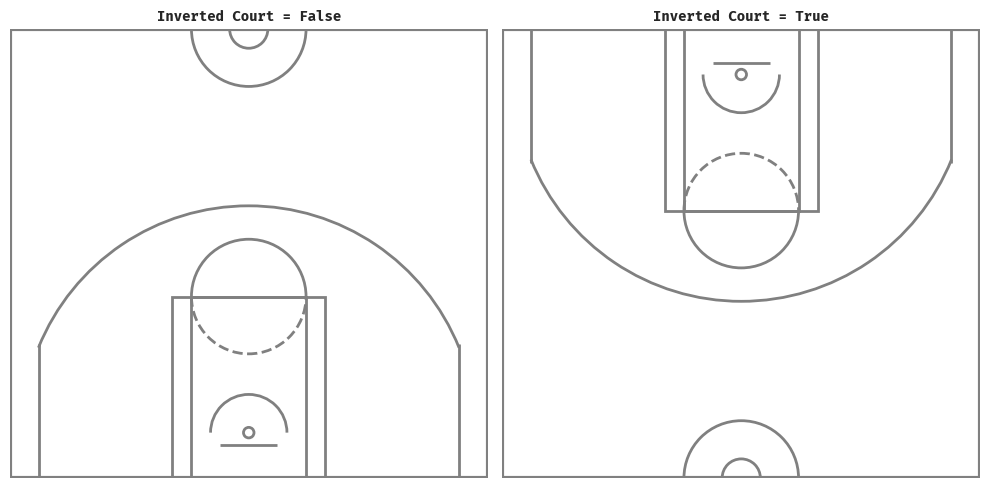

In [153]:
# a figure with a single Axes
fig, ax = plt.subplots(1,2, figsize=(10, 5)) 

# Plot normal half-court
ax[0] = draw_court(ax=ax[0], color="gray", lw=2, ax_frame=False,
                   ax_ticks= False, outer_lines=True, inverted_court=False)
ax[0].set_title("Inverted Court = False", font=title_font, fontweight='bold') 
# Plot inverted half-court
ax[1] = draw_court(ax=ax[1], color="gray", lw=2, ax_frame=False,
                   outer_lines=True, inverted_court=True)
ax[1].set_title("Inverted Court = True", font=title_font, fontweight='bold')

plt.tight_layout()
plt.show();

##### WORKING WITH ORIGINAL DATA COLLECTED FROM FCPYTHON


In [154]:
dtigress_df.describe()

,x,y,shot_points,game_id,exp_shot_points
count,85.000000,85.000000,85.000000,85.0,85.000000
mean,47.952941,45.870588,0.823529,200005.0,2.070588
std,35.551742,18.572117,1.048542,0.0,0.613115
min,6.000000,3.000000,0.000000,200005.0,1.000000
25%,12.000000,38.000000,0.000000,200005.0,2.000000
50%,29.000000,49.000000,0.000000,200005.0,2.000000
75%,83.000000,55.000000,2.000000,200005.0,2.000000
max,93.000000,92.000000,3.000000,200005.0,3.000000


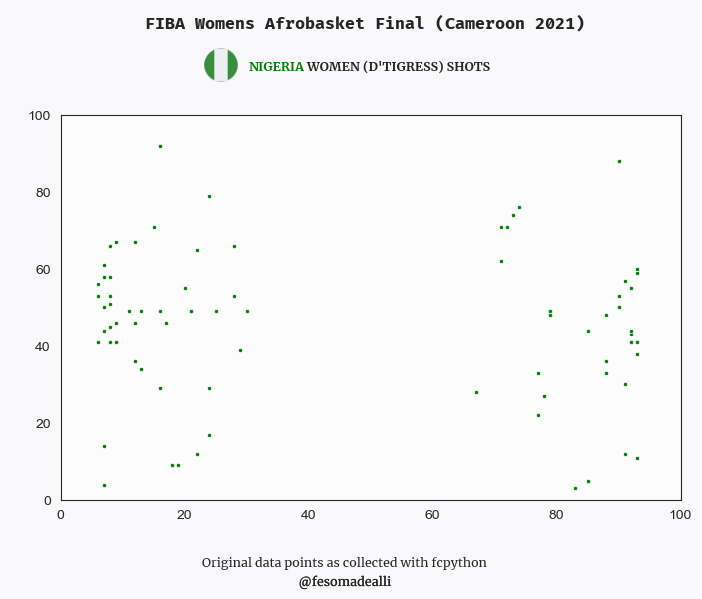

In [155]:
# drawing the axes 
fig,axs = plt.subplots(1,1, figsize=(8,5))

# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# specifying the ticks
xmin,xmax = (0,100) # from fcpython
ymin,ymax = (0,100) # from fcpython
# drawing the ticks on the figure
axs.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# removing label of each axis 
axs.set_xlabel(' ')
axs.set_ylabel(' ')

# setting up highlight-text() objects 
import highlight_text # then use highlight_text.ax_text or highlight_text.fig_text
h_axs = highlight_text.ax_text 
h_fig = highlight_text.fig_text

# Set titles for the figure and the subplot respectively
h_fig(x=.23, y=1.08, s='FIBA Womens Afrobasket Final (Cameroon 2021)', 
      font=title_font, fontsize=title_fsize, fontweight='bold', zorder=2)
h_fig(x=.36, y=0.99, s='<NIGERIA> WOMEN (D\'TIGRESS) SHOTS', highlight_textprops=[{'color':'green'}],
      font=body_font, fontsize=body_fsize, fontweight='semibold', zorder=2)

# Endnotes
endnote = fig.text(x=0.48, y= -.015, s='Original data points as collected with fcpython', 
                    ha='center', va='center', font=body_font, fontsize=body_fsize, zorder=2)

# Path Effects for Name text
import matplotlib.patheffects as path_effects
name_text = fig.text(x=0.48, y= -.055, s='@fesomadealli', ha='center', va='center', 
                   font=body_font, fontsize=body_fsize, zorder=2)
name_text.set_path_effects([path_effects.Stroke(linewidth=.015, foreground='black'),
                          path_effects.Normal()])

# adding images to our figure
from PIL import Image
# open the image file
img_ngr = Image.open('img_ngr.png')
# creating the image axes
'''([a,b,c,d])
(a,b) is the point in southwest corner of the rectangle which we create.
c represents width and d represents height of the respective rectangle.'''
img_axs = fig.add_axes([0.3, 0.93, 0.05, 0.1], anchor='C', zorder=2)
img_axs.imshow(img_ngr)
img_axs.axis('off')

# plotting the scatter on the plot
sns.scatterplot(ax=axs, x=dtigress_df['x'], y=dtigress_df['y'], color='green', marker='.', zorder=1)         

# plt.savefig("dtigress-afrobasket-fcpython")
plt.show(); # this line with the semicolon (;) supresses all the extra text befor a plot

In [156]:
# Half Court (Merged) Data Points
dtigress_df['halfcourt_x'] = np.where(dtigress_df['x'] < 50, 100 - dtigress_df['x'], 
                               dtigress_df['x'])
# Half Court (Merged) Data Points
dtigress_df['halfcourt_y'] = np.where(dtigress_df['x'] < 50, 100 - dtigress_df['y'], 
                               dtigress_df['y'])

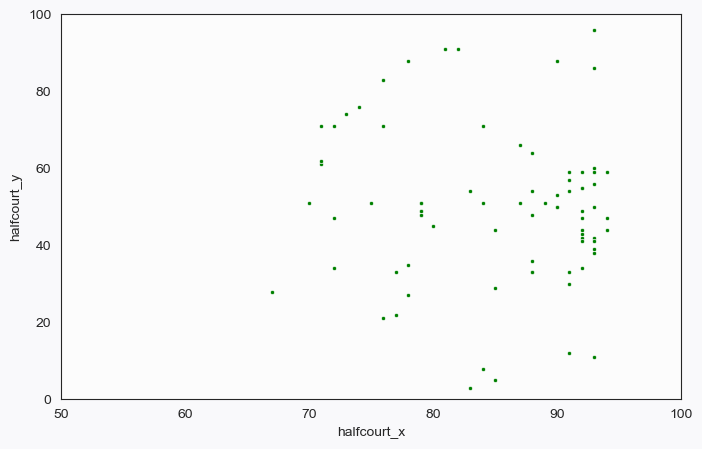

In [157]:
# drawing half the axes on a big figure
fig, axs = plt.subplots(1,1, figsize=(8,5))

# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# specifying the ticks
xmin,xmax = (50,100) # half the court on the x-axis
ymin,ymax = (0,100) 
# drawing the ticks on the figure
axs.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# all shots shown on a half court
hx = dtigress_df['halfcourt_x']
hy = dtigress_df['halfcourt_y']

# plotting the scatter on the plot
sns.scatterplot(ax=axs, x=hx, y=hy, color='green', marker='.', zorder=1)

plt.show();


##### Data was collected on a horizontal court and need to be transformed. 
Transposing the Axes

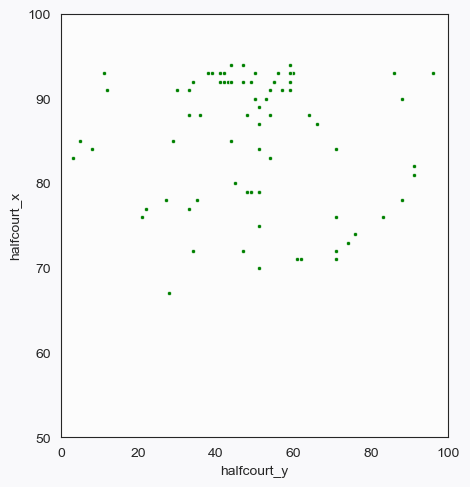

In [158]:
# drawing half the axes 
fig, axs = plt.subplots(1,1, figsize=(5,5.5))
# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# specifying the ticks
xmin,xmax = (0,100) # half the court on the x-axis
ymin,ymax = (50,100) # 
# drawing the ticks on the figure
axs.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# plotting the scatter on the plot
sns.scatterplot(ax=axs, x=hy, y=hx, color='green', marker='.', zorder=1)
plt.show();

##### LINEAR TRANSFORMATION OF THE HALFCOURT AXES
The halfcourt scatterplot is already in the way our court is positioned, we need only transform the axes so that it matches the dimensions on the court. Bearing in mind that the hx was plotted on the y-axis and hy on the x-axis. We will therefore us the hx to get the y-equivalent of the axes containing our `draw_court()` plot function and vice versa.

To modify the data points to fit the new axes limits, you need to perform a transformation that scales and shifts the original data points. You can achieve this by mapping the original data points from the range of ```(0, 100)``` to the new range of ```(-250, 250)``` for the x-axis and from the range of ```(50, 100)``` to the new range of ```(422.5, -47.5)``` for the y-axis. The transformed data points are then plotted on the new axes along with the basketball court using the draw_court() function.

We will be sticking with the Inverted Court (as a personal preference), so the following applies:

Transforming our scatterplot from the original datapoints done with the fcpython event tagger tool, that is, $(x_{hx}, y_{hy})$ (where hx & hy refer to the respective x,y points on the halfcourts respectively), to a transformed axes object $(x_{tx},y_{ty})$ where the draw_court() fits, we'd use: 

$t_{x} = x_{tx-xmin} + [5 *(h_{y} - y_{hy-ymin})]$ ---- for all x in data points 

**case one:** `inverted_court=True`

$t_{y} = y_{ty-ymin} - [9.4 * (h_{x} - x_{hx-xmin})]$ ---- for all y in data points


**case two:** `inverted_court=False`

$t_{y} = y_{ty-ymin} + [9.4 * (h_{x} - x_{hx-xmin})]$ ---- for all y in data points

where:
- $x_{hx-xmin}$ and $y_{hy-ymin}$ are the x and y lower bounds of the halfcourt axes respectively.
- $x_{tx-xmin}$ and $y_{ty-ymin}$ are the x and y lower bounds of the transformed axes respectively.

In [159]:
# limits for halfcourts axes
hy_xmin = 0  # from xlim(0,100) since hy was plotted on x-axis
hx_ymin = 50 # from ylim(50,100) since hx was plotted on y-axis

# xlims for the transformed axes
tx_xmin = -250 # from xlim(-250, 250)
ty_ymin = 422.5 # from ylim(422.5, -47.5)

# performing transformation on our data points
# court is inverted (inverted=True)
dtigress_df['transformed_y'] = ty_ymin - ((dtigress_df['halfcourt_x'] - hx_ymin) * 9.4)
dtigress_df['transformed_x'] = tx_xmin + ((dtigress_df['halfcourt_y'] - hy_xmin) * 5)

dtigress_df.head()

,shoot_team,shoot_player,event,x,y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
0,NGR,22,Shot,12,36,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,88,64,65.3,70
1,NGR,23,Shot,13,34,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,87,66,74.7,80
2,NGR,25,Shot,16,92,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,84,8,102.9,-210
3,NGR,22,Shot,29,39,22,NGR,miss,3s,0,NaN,200005,Q1,3.0,71,61,225.1,55
4,NGR,52,Shot,20,55,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,80,45,140.5,-25


In [160]:
dtigress_df.tail()

,shoot_team,shoot_player,event,x,y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
80,NGR,10,Shot,77,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85
81,NGR,23,Shot,77,22,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140
82,NGR,10,Shot,90,50,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0
83,NGR,7,Shot,83,3,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235
84,NGR,10,Shot,88,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,88,33,65.3,-85


In [161]:
dtigress_df[['transformed_x', 'transformed_y']].describe()

,transformed_x,transformed_y
count,85.000000,85.000000
mean,-2.529412,97.370588
std,95.120924,71.327626
min,-235.000000,8.900000
25%,-45.000000,27.700000
50%,-5.000000,74.700000
75%,45.000000,149.900000
max,230.000000,262.700000


##### Inspecting Results

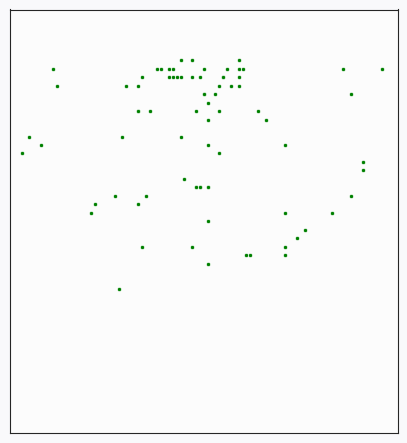

In [162]:
# renaming the columns to plot
tx = dtigress_df['transformed_x']
ty = dtigress_df['transformed_y'] 

# drawing half the axes 
fig, axs = plt.subplots(1,1, figsize=(5,5.5))
# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# specifying the ticks
xmin,xmax = (-250,250)
ymin,ymax = (422.5,-47.5) 
# drawing the ticks on the figure
axs.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axs.set_xticks([])
axs.set_yticks([])

# plotting the scatter on the plot
sns.scatterplot(ax=axs, x=tx, y=ty, color='green', marker='.', zorder=1)
plt.show();

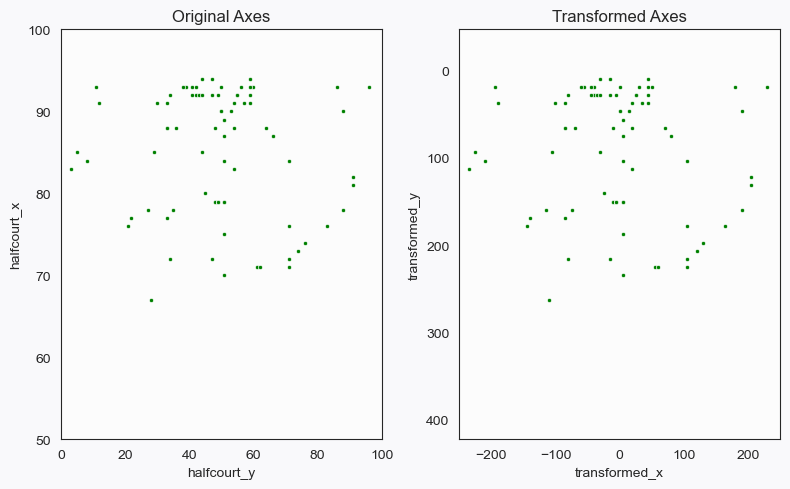

In [163]:
# drawing half the axes 
fig, axs = plt.subplots(1,2, figsize=(8,5))
# setting the color background_color axes
axs[0].set_facecolor(bg_color)
axs[1].set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

"""Data Points on Original Axes"""
# specifying the ticks
xmin,xmax = (0,100) # half the court on the x-axis
ymin,ymax = (50,100) # 
# drawing the ticks on the figure
axs[0].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axs[0].set_title('Original Axes')
# plotting the scatter on the plot
sns.scatterplot(ax=axs[0], x=hy, y=hx, color='green', marker='.', zorder=1)

"""Data Points on Transformed Axes"""
# specifying the ticks
xmin,xmax = (-250,250)
ymin,ymax = (422.5, -47.5) 
# drawing the ticks on the figure
axs[1].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axs[1].set_title('Transformed Axes')
# plotting the scatter on the plot
sns.scatterplot(ax=axs[1], x=tx, y=ty, color='green', marker='.', zorder=1)

plt.savefig('Comparing Original & Transformed Axes')
plt.tight_layout()
plt.show();

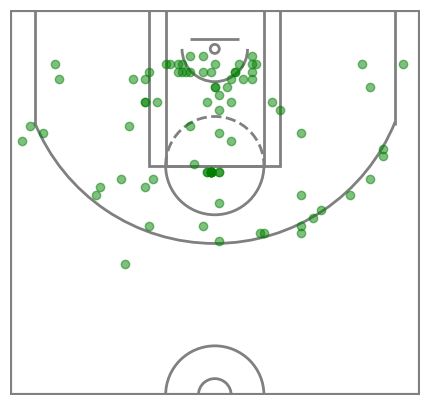

In [164]:
# Create a figure and axes for the basketball court
fig, axs = plt.subplots(figsize=(8, 5))
#  adding the court
draw_court(ax=axs, color='gray', outer_lines=True, ax_frame=False, 
           ax_ticks= False, inverted_court=True)
# plotting the shots
axs.scatter(x=tx, y=ty, color='green', marker='o', alpha=.5, zorder=1)
plt.show();

##### IMPROVING OUR VIZ

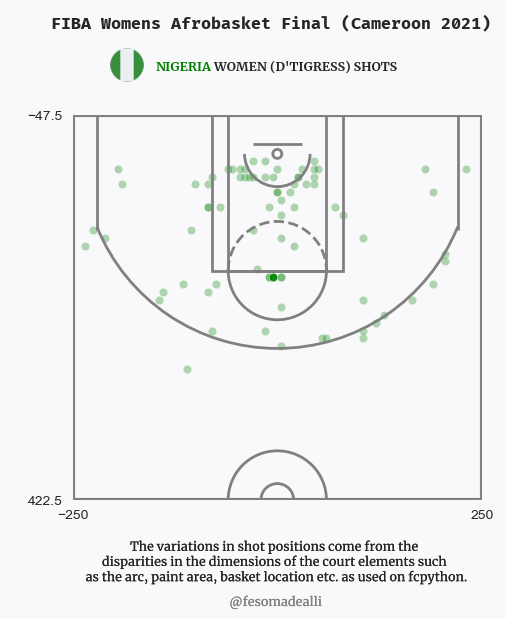

In [165]:
# drawing the axes 
fig,axs = plt.subplots(1,1, figsize=(8,5))

# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# removing label of each axis 
axs.set_xlabel(' ')
axs.set_ylabel(' ')

# setting up highlight-text() objects 
import highlight_text # then use highlight_text.ax_text or highlight_text.fig_text
h_axs = highlight_text.ax_text 
h_fig = highlight_text.fig_text

# Set titles for the figure and the subplot respectively
h_fig(x=.23, y=1.08, s='FIBA Womens Afrobasket Final (Cameroon 2021)', 
      font=title_font, fontsize=title_fsize, fontweight='bold', zorder=2)
h_fig(x=.36, y=0.99, s='<NIGERIA> WOMEN (D\'TIGRESS) SHOTS', highlight_textprops=[{'color':'green'}],
      font=body_font, fontsize=body_fsize, fontweight='semibold', zorder=2)

# Endnotes
endnote_text = ("The variations in shot positions come from the " + '\n'
                "disparities in the dimensions of the court elements such " + '\n'
                "as the arc, paint area, basket location etc. as used on fcpython.")
endnote = fig.text(x=0.51, y= -.015, s=endnote_text, 
                   ha='center', va='center', font=body_font, fontsize=body_fsize, zorder=2)
name_text = fig.text(x=0.51, y= -.095, s='@fesomadealli', ha='center', va='center', 
                   font=body_font, color='grey', fontsize=body_fsize, zorder=2)

# Path Effects for texts
import matplotlib.patheffects as path_effects
endnote.set_path_effects([path_effects.Stroke(linewidth=.018, foreground='black'),
                          path_effects.Normal()])
name_text.set_path_effects([path_effects.Stroke(linewidth=.005, foreground='grey'), 
                            path_effects.Normal()])

# adding images to our figure
from PIL import Image
# open the image file
img_ngr = Image.open('img_ngr.png')
# creating the image axes
'''([a,b,c,d])
(a,b) is the point in southwest corner of the rectangle which we create.
c represents width and d represents height of the respective rectangle.'''
img_axs = fig.add_axes([0.3, 0.93, 0.05, 0.1], anchor='C', zorder=2)
img_axs.imshow(img_ngr)
img_axs.axis('off')

# making the shot plot
sns.scatterplot(ax=axs, x=dtigress_df['transformed_x'], y=dtigress_df['transformed_y'], 
                color='green', marker='o', alpha=.3, zorder=1)
#  adding the court
draw_court(ax=axs, color='gray', outer_lines=True, ax_frame=False, 
           ax_ticks= True, inverted_court=True)

# plt.savefig("dtigress-afrobasket-fcpython")
plt.show(); # this line with the semicolon (;) supresses all the extra text befor a plot

In [166]:
dtigress_df.tail()

,shoot_team,shoot_player,event,x,y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
80,NGR,10,Shot,77,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85
81,NGR,23,Shot,77,22,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140
82,NGR,10,Shot,90,50,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0
83,NGR,7,Shot,83,3,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235
84,NGR,10,Shot,88,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,88,33,65.3,-85


In [167]:
dtigress_df.shot_distance.value_counts()

paint shot    37
3s            19
in-arc        16
freethrow     13
Name: shot_distance, dtype: int64

In [168]:
shot_loc = dtigress_df.shot_distance.unique()
shot_loc[0]
type(shot_loc[0])
shot_cnt = dtigress_df.shot_distance.value_counts().to_list()
shot_cnt
type(shot_cnt[0])

'paint shot'

str

[37, 19, 16, 13]

int

In [169]:
len(shot_cnt)

4

In [170]:
shot_text = ""
for i in range(len(shot_cnt)):
    if i != (len(shot_cnt) - 1):  # if current item isn't the last item in the lists
        # print text with newline character
        shot_text += shot_loc[i] + ': ' + str(shot_cnt[i]) + '\n'
        i +=1
    else: # do this if current item is the last item in the lists
        #do text alone without newline character
        shot_text += shot_loc[i] + ': ' + str(shot_cnt[i])

In [171]:
print(shot_text)

paint shot: 37
3s: 19
in-arc: 16
freethrow: 13


In [172]:
dtigress_df.tail()

,shoot_team,shoot_player,event,x,y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
80,NGR,10,Shot,77,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85
81,NGR,23,Shot,77,22,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140
82,NGR,10,Shot,90,50,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0
83,NGR,7,Shot,83,3,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235
84,NGR,10,Shot,88,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,88,33,65.3,-85


As explained on the plot

##### ADDING PLAYER NAMES TO OUR DATASET
Let's combine the shot df and the ngr_roster df to add player name and open up for more analysis in the future.

In [173]:
ngr_roster

,SQUAD_NO,PLAYER_NAME,POSITION,CLUB_SIDE,DATE_OF_BIRTH,AGE,HEIGHT(cm),HEIGHT(ft-in),NATIONALITY,MLI,STATE,ORIGIN,PLACE_OF_BIRTH,AVG_HEIGHT (cm),AVG_HEIGHT (ft-in),AVG_AGE
0,0,Amy OKONKWO,forward,CD Zamarat,26/08/1996,26.0,188.0,"6'2""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
1,3,Pallas KUNAIYI-AKPANAH,center,Basket Namur Capitale,12/07/1997,25.0,188.0,"6'2""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
2,7,Sarah OGOKE,shooting guard,Ferroviario Maputo,25/06/1990,32.0,175.0,"5'9""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
3,10,Promise AMUKAMARA,point guard,Charnay Basket Bourgogne SUD,22/06/1993\r,29.0,175.0,"5'9""",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
4,11,Adaora ELONU,forward,Spar Girona,28/04/1990\r,32.0,185.0,"6'1""",Nigerian,starting-5,NaN,NaN,NaN,184.0,"6'0""",28.0
5,12,Nkem AKARAIWE,forward,CB Andratx,22/12/1996\r,26.0,183.0,"6'0""\r",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
6,20,Murjanatu MUSA,forward,Air Warrior Basketball Club,05/05/2000,22.0,187.0,"6'2""",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
7,22,Oderah CHIDOM,center,Angers\r,09/07/1995,27.0,193.0,"6'4""",Nigerian,reserve,NaN,NaN,NaN,184.0,"6'0""",28.0
8,23,Ezinne KALU,point guard,Landerneau Bretagne Basket,26/06/1992,30.0,173.0,"5'8""",Nigerian,starting-5,NaN,NaN,NaN,184.0,"6'0""",28.0
9,25,Victoria MACAULAY,center,Bursa Uludag Basketbol,07/08/1990,32.0,193.0,"6'4""\r",Nigerian,starting-5,NaN,NaN,NaN,184.0,"6'0""",28.0


In [174]:
dtigress_df

,shoot_team,shoot_player,event,x,y,shoot_player,shoot_team,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
0,NGR,22,Shot,12,36,22,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,88,64,65.3,70
1,NGR,23,Shot,13,34,23,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,87,66,74.7,80
2,NGR,25,Shot,16,92,25,NGR,hit,3s,3,NaN,200005,Q1,3.0,84,8,102.9,-210
3,NGR,22,Shot,29,39,22,NGR,miss,3s,0,NaN,200005,Q1,3.0,71,61,225.1,55
4,NGR,52,Shot,20,55,52,NGR,miss,paint shot,0,NaN,200005,Q1,2.0,80,45,140.5,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NGR,10,Shot,77,33,10,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85
81,NGR,23,Shot,77,22,23,NGR,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140
82,NGR,10,Shot,90,50,10,NGR,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0
83,NGR,7,Shot,83,3,7,NGR,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235


How to [Drop duplicate columns](https://www.statology.org/pandas-drop-duplicate-columns/)

In [175]:
#remove duplicate columns
dtigress_df = dtigress_df.T.drop_duplicates().T
dtigress_df

,shoot_team,shoot_player,event,x,y,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
0,NGR,22,Shot,12,36,miss,paint shot,0,NaN,200005,Q1,2.0,88,64,65.3,70
1,NGR,23,Shot,13,34,miss,paint shot,0,NaN,200005,Q1,2.0,87,66,74.7,80
2,NGR,25,Shot,16,92,hit,3s,3,NaN,200005,Q1,3.0,84,8,102.9,-210
3,NGR,22,Shot,29,39,miss,3s,0,NaN,200005,Q1,3.0,71,61,225.1,55
4,NGR,52,Shot,20,55,miss,paint shot,0,NaN,200005,Q1,2.0,80,45,140.5,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NGR,10,Shot,77,33,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85
81,NGR,23,Shot,77,22,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140
82,NGR,10,Shot,90,50,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0
83,NGR,7,Shot,83,3,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235


In [176]:
squad_num = ngr_roster.SQUAD_NO.to_list()
squad_name = ngr_roster.PLAYER_NAME.to_list()
squad_num
squad_name

[0, 3, 7, 10, 11, 12, 20, 22, 23, 25, 33, 52, 100]

['Amy  OKONKWO',
 'Pallas KUNAIYI-AKPANAH',
 'Sarah OGOKE',
 'Promise AMUKAMARA',
 'Adaora ELONU',
 'Nkem AKARAIWE',
 'Murjanatu MUSA',
 'Oderah CHIDOM',
 'Ezinne KALU',
 'Victoria MACAULAY',
 'Nicole ENABOSI',
 'Ify IBEKWE',
 'Otis HUGHLEY']

In [177]:
dtigress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   shoot_team            85 non-null     object
 1   shoot_player          85 non-null     object
 2   event                 85 non-null     object
 3   x                     85 non-null     object
 4   y                     85 non-null     object
 5   current_shot_outcome  85 non-null     object
 6   shot_distance         85 non-null     object
 7   shot_points           85 non-null     object
 8   note                  9 non-null      object
 9   game_id               85 non-null     object
 10  quarter               85 non-null     object
 11  exp_shot_points       85 non-null     object
 12  halfcourt_x           85 non-null     object
 13  halfcourt_y           85 non-null     object
 14  transformed_y         85 non-null     object
 15  transformed_x         85 non-null     obje

In [178]:
player_names = {
        '0': 'Amy  OKONKWO',
        '3': 'Pallas KUNAIYI-AKPANAH',
        '7': 'Sarah OGOKE',
        '10': 'Promise AMUKAMARA',
        '11': 'Adaora ELONU',
        '12': 'Nkem AKARAIWE',
        '20': 'Murjanatu MUSA',
        '22': 'Oderah CHIDOM',
        '23': 'Ezinne KALU',
        '25': 'Victoria MACAULAY',
        '33': 'Nicole ENABOSI',
        '52': 'Ify IBEKWE'
    }

# Assigning player names
dtigress_df['player_name'] = dtigress_df['shoot_player'].map(player_names)
dtigress_df.tail()

,shoot_team,shoot_player,event,x,y,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x,player_name
80,NGR,10,Shot,77,33,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85,Promise AMUKAMARA
81,NGR,23,Shot,77,22,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140,Ezinne KALU
82,NGR,10,Shot,90,50,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0,Promise AMUKAMARA
83,NGR,7,Shot,83,3,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235,Sarah OGOKE
84,NGR,10,Shot,88,33,miss,in-arc,0,NaN,200005,Q4,2.0,88,33,65.3,-85,Promise AMUKAMARA


In [347]:
dtigress_df = dtigress_df.loc[:,['shoot_team',	'shoot_player',	'player_name', 'event',	'x',	'y',	'current_shot_outcome',	
           'shot_distance',	'shot_points',	'note',	'game_id',	'quarter',	'exp_shot_points',	
           'halfcourt_x',	'halfcourt_y',	'transformed_y',	'transformed_x']]
dtigress_df

,shoot_team,shoot_player,player_name,event,x,y,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
0,NGR,22,Oderah CHIDOM,Shot,12,36,miss,paint shot,0,NaN,200005,Q1,2.0,88,64,65.3,70
1,NGR,23,Ezinne KALU,Shot,13,34,miss,paint shot,0,NaN,200005,Q1,2.0,87,66,74.7,80
2,NGR,25,Victoria MACAULAY,Shot,16,92,hit,3s,3,NaN,200005,Q1,3.0,84,8,102.9,-210
3,NGR,22,Oderah CHIDOM,Shot,29,39,miss,3s,0,NaN,200005,Q1,3.0,71,61,225.1,55
4,NGR,52,Ify IBEKWE,Shot,20,55,miss,paint shot,0,NaN,200005,Q1,2.0,80,45,140.5,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NGR,10,Promise AMUKAMARA,Shot,77,33,miss,in-arc,0,NaN,200005,Q4,2.0,77,33,168.7,-85
81,NGR,23,Ezinne KALU,Shot,77,22,miss,in-arc,0,NaN,200005,Q4,2.0,77,22,168.7,-140
82,NGR,10,Promise AMUKAMARA,Shot,90,50,miss,paint shot,0,NaN,200005,Q4,2.0,90,50,46.5,0
83,NGR,7,Sarah OGOKE,Shot,83,3,miss,3s,0,NaN,200005,Q4,3.0,83,3,112.3,-235


##### ADJUSTING OUR COURT ELEMENTS

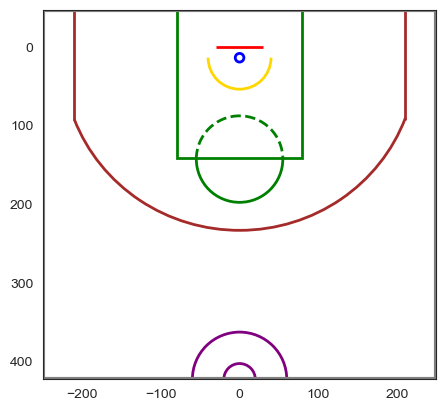

In [233]:
#  importing extra packages for our dataviz
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
# setting up axis
ax = plt.gca()
# specifying the limits of the axes
xmin, xmax = (-250, 250) 
ymin, ymax = (422.5, -47.5)

# Set court dimensions and ticks
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_aspect('equal')
ax.set_frame_on('on')    

     
# Create the various parts/elements of an NBA basketball court

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-210, -47.5), 0, 140, linewidth=2, color='brown')
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((210, -47.5), 0, 140, linewidth=2, color='brown')
# The paint area
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_paintbox = Rectangle((-80, -47.5), 160, 188, linewidth=2, color='green', fill=False)
# Create the basketball hoop
hoop = Circle((0, 13.6), radius=5.5, linewidth=2, color='blue', fill=False)
# Create backboard
backboard = Rectangle((-30, -.5), 60, 0, linewidth=2, color='red')
# Create freethrow top arc
top_free_throw_arc = Arc((0, 142.50), 110, 110, theta1=0, theta2=180,
                     linewidth=2, color='green', fill=False) # -47.5 + 190 = 142.5
# Create freethrow bottom arc
bottom_free_throw_arc = Arc((0, 142.5), 110, 110, theta1=180, theta2=0,
                            linewidth=2, color='green', linestyle='dashed')
# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=2, color='purple')
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=2, color='purple')
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 13.6), 450, 439, theta1=20, theta2=159.5, linewidth=2, color='brown')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted_arc = Arc((0, 13.6), 80, 80, theta1=0, theta2=180, linewidth=2,  color='gold')
    
# Draw the half court line, baseline and side out bound lines
outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=2*1.5, color='grey', fill=False)


# Adding each part to the axes object
court_elements = [corner_three_a, corner_three_b, outer_paintbox, backboard, 
                  hoop, top_free_throw_arc, bottom_free_throw_arc, restricted_arc,
                  three_arc, center_outer_arc, center_inner_arc, outer_lines]


# Add the court elements onto the axes
for element in court_elements:
    ax.add_patch(element)
plt.show();

###### UPDATING COURT DIMENSIONS

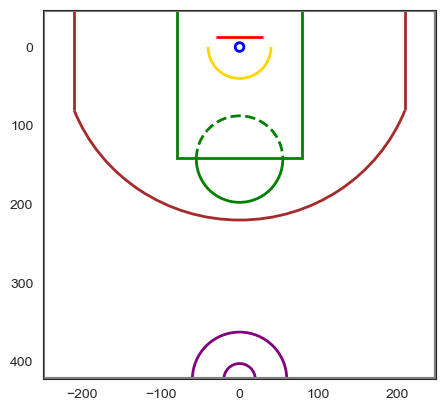

In [318]:
# setting up axis
ax = plt.gca()
# specifying the limits of the axes
xmin, xmax = (-250, 250) 
ymin, ymax = (422.5, -47.5)

# Set court dimensions and ticks
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_aspect('equal')
ax.set_frame_on('on')    

     
# Adjusting the various parts/elements of an NBA basketball court

# The paint area
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_paintbox = Rectangle((-80, -47.5), 160, 188, linewidth=2, color='green', fill=False)
# Create the basketball hoop
hoop = Circle((0, 0), radius=5.5, linewidth=2, color='blue', fill=False)
# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=2, color='red')
# Create freethrow top arc
top_free_throw_arc = Arc((0, 142.50), 110, 110, theta1=0, theta2=180,
                     linewidth=2, color='green', fill=False) # -47.5 + 190 = 142.5
# Create freethrow bottom arc
bottom_free_throw_arc = Arc((0, 142.5), 110, 110, theta1=180, theta2=0,
                            linewidth=2, color='green', linestyle='dashed')
# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=2, color='purple')
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=2, color='purple')

# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted_arc = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=2,  color='gold')
    
# Draw the half court line, baseline and side out bound lines
outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=2*1.5, color='grey', fill=False)


# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-210, -47.5), 0, 128, linewidth=2, color='brown')
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((210, -47.5), 0, 128, linewidth=2, color='brown')
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 452, 440, theta1=21, theta2=159, linewidth=2, color='brown')
# Adding each part to the axes object
court_elements = [corner_three_a, corner_three_b, outer_paintbox, backboard, 
                  hoop, top_free_throw_arc, bottom_free_throw_arc, restricted_arc,
                  three_arc, center_outer_arc, center_inner_arc, outer_lines]

# Add the court elements onto the axes
for element in court_elements:
    ax.add_patch(element)
    
plt.show();

In [326]:
def adj_court(ax=None, color="grey", lw=2, ax_frame=False, ax_ticks=False, 
               outer_lines=True, inverted_court=True):
    # setting up axis
    if ax is None:
        ax = plt.gca()

    # CREATE VARIOUS PARTS OF AN NBA basketball court
    # Create the basketball hoop
    hoop = Circle((0, 0), radius=5.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 188, linewidth=lw, 
                          color=color, fill=False)
    # Create freethrow top arc
    top_free_throw_arc = Arc((0, 142.50), 110, 110, theta1=0, theta2=180,
                             linewidth=lw, color=color, fill=False) # -47.5 + 190 = 142.5
    # Create free throw bottom arc
    bottom_free_throw_arc = Arc((0, 142.5), 110, 110, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-210, -47.5), 0, 128, linewidth=lw, color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((210, -47.5), 0, 128, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 452, 440, theta1=21, theta2=159,
                    linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, 
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, 
                           linewidth=lw, color=color)

    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw_arc, 
                      bottom_free_throw_arc, restricted, corner_three_a, 
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw*1.5,
                                color=color, fill=False)
        court_elements.append(outer_lines)
        
    # specifying the limits of the axes
    xmin, xmax = (-250, 250) 
    if inverted_court:
        ymin, ymax = (422.5, -47.5)
    else:
        ymin, ymax = (-47.5, 422.5)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    if ax_ticks:
        ax.set_xticks([xmin, xmax])
        ax.set_yticks([ymin, ymax])
    else:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Set court dimensions and ticks
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_aspect('equal')
    ax.set_frame_on(ax_frame)
        
    return ax


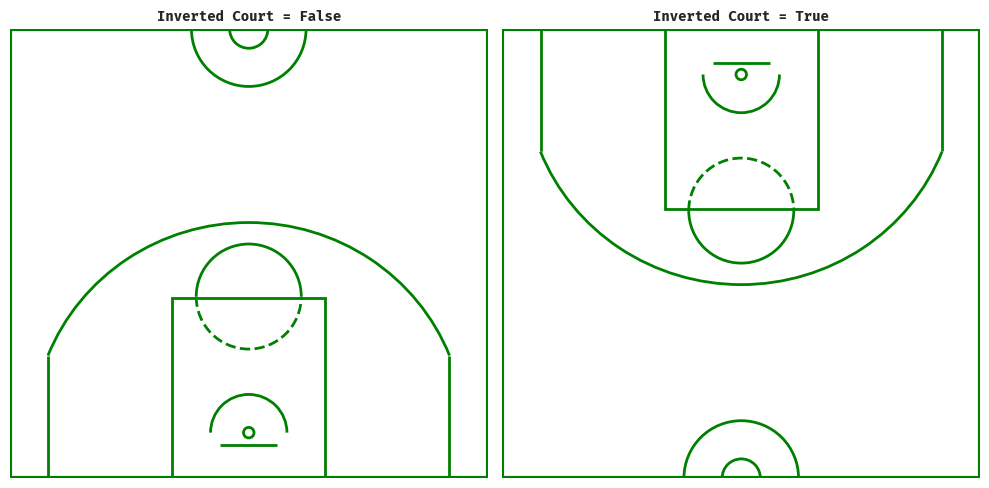

In [329]:
# a figure with a single Axes
fig, ax = plt.subplots(1,2, figsize=(10, 5)) 

# Plot normal half-court
ax[0] = adj_court(ax=ax[0], color="green", lw=2, ax_frame=False,
                   ax_ticks= False, outer_lines=True, inverted_court=False)
ax[0].set_title("Inverted Court = False", font=title_font, fontweight='bold') 
# Plot inverted half-court
ax[1] = adj_court(ax=ax[1], color="green", lw=2, ax_frame=False,
                   outer_lines=True, inverted_court=True)
ax[1].set_title("Inverted Court = True", font=title_font, fontweight='bold')

plt.tight_layout()
plt.show();


###### PLOTTING THE SHOTS ON OUR ADJUSTED AXES

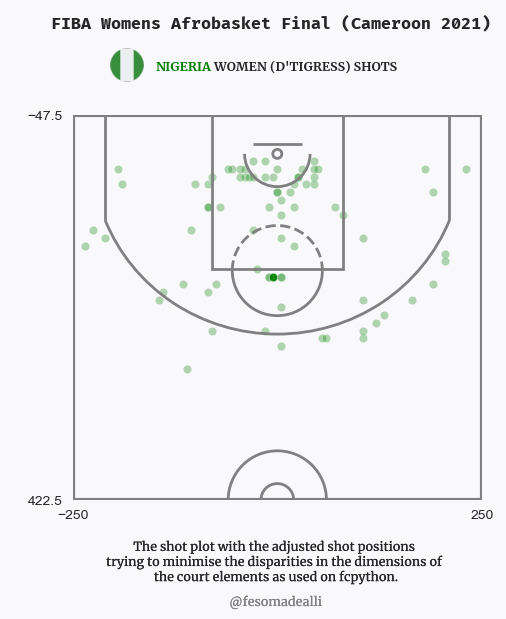

In [335]:
# drawing the axes 
fig,axs = plt.subplots(1,1, figsize=(8,5))

# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# removing label of each axis 
axs.set_xlabel(' ')
axs.set_ylabel(' ')

# setting up highlight-text() objects 
import highlight_text # then use highlight_text.ax_text or highlight_text.fig_text
h_axs = highlight_text.ax_text 
h_fig = highlight_text.fig_text

# Set titles for the figure and the subplot respectively
h_fig(x=.23, y=1.08, s='FIBA Womens Afrobasket Final (Cameroon 2021)', 
      font=title_font, fontsize=title_fsize, fontweight='bold', zorder=2)
h_fig(x=.36, y=0.99, s='<NIGERIA> WOMEN (D\'TIGRESS) SHOTS', highlight_textprops=[{'color':'green'}],
      font=body_font, fontsize=body_fsize, fontweight='semibold', zorder=2)

# Endnotes
endnote_text = ("The shot plot with the adjusted shot positions " + '\n'
                "trying to minimise the disparities in the dimensions of " + '\n'
                "the court elements as used on fcpython.")
endnote = fig.text(x=0.51, y= -.015, s=endnote_text, 
                   ha='center', va='center', font=body_font, fontsize=body_fsize, zorder=2)
name_text = fig.text(x=0.51, y= -.095, s='@fesomadealli', ha='center', va='center', 
                   font=body_font, color='grey', fontsize=body_fsize, zorder=2)

# Path Effects for texts
import matplotlib.patheffects as path_effects
endnote.set_path_effects([path_effects.Stroke(linewidth=.018, foreground='black'),
                          path_effects.Normal()])
name_text.set_path_effects([path_effects.Stroke(linewidth=.005, foreground='grey'), 
                            path_effects.Normal()])

# adding images to our figure
from PIL import Image
# open the image file
img_ngr = Image.open('img_ngr.png')
# creating the image axes
'''([a,b,c,d])
(a,b) is the point in southwest corner of the rectangle which we create.
c represents width and d represents height of the respective rectangle.'''
img_axs = fig.add_axes([0.3, 0.93, 0.05, 0.1], anchor='C', zorder=2)
img_axs.imshow(img_ngr)
img_axs.axis('off')

# making the shot plot
sns.scatterplot(ax=axs, x=dtigress_df['transformed_x'], y=dtigress_df['transformed_y'], 
                color='green', marker='o', alpha=.3, zorder=1)
#  adding the court
adj_court(ax=axs, color='gray', outer_lines=True, ax_frame=False, 
           ax_ticks= True, inverted_court=True)

# plt.savefig("dtigress-afrobasket-adjusted")
plt.show(); # this line with the semicolon (;) supresses all the extra text befor a plot

In [348]:
# Filter the DataFrame to get rows where shot_distance is 'paint shot'
threes_df = dtigress_df[dtigress_df['shot_distance'] == '3s']

threes_df.head()
threes_df.shape
threes_df.describe(include='all')

,shoot_team,shoot_player,player_name,event,x,y,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
2,NGR,25,Victoria MACAULAY,Shot,16,92,hit,3s,3,NaN,200005,Q1,3.0,84,8,102.9,-210
3,NGR,22,Oderah CHIDOM,Shot,29,39,miss,3s,0,NaN,200005,Q1,3.0,71,61,225.1,55
11,NGR,23,Ezinne KALU,Shot,28,66,miss,3s,0,NaN,200005,Q1,3.0,72,34,215.7,-80
13,NGR,25,Victoria MACAULAY,Shot,30,49,hit,3s,3,NaN,200005,Q1,3.0,70,51,234.5,5
19,NGR,25,Victoria MACAULAY,Shot,24,17,hit,3s,3,NaN,200005,Q1,3.0,76,83,178.1,165


(19, 17)

,shoot_team,shoot_player,player_name,event,x,y,current_shot_outcome,shot_distance,shot_points,note,game_id,quarter,exp_shot_points,halfcourt_x,halfcourt_y,transformed_y,transformed_x
count,19,19,19,19,19,19,19,19,19,2,19,19,19.0,19,19,19.0,19
unique,1,8,8,1,16,17,3,1,2,2,1,4,1.0,14,17,14.0,17
top,NGR,25,Victoria MACAULAY,Shot,28,9,miss,3s,0,start of second quarter,200005,Q1,3.0,71,91,225.1,205
freq,19,4,4,19,2,2,11,19,12,1,19,6,19.0,3,2,3.0,2


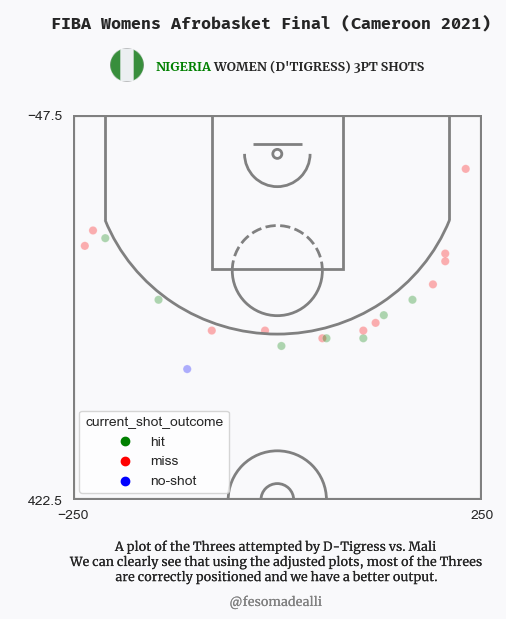

In [366]:
# drawing the axes 
fig,axs = plt.subplots(1,1, figsize=(8,5))

# setting the color background_color axes
axs.set_facecolor(bg_color)
fig.set_facecolor(fig_bg)

# removing label of each axis 
axs.set_xlabel(' ')
axs.set_ylabel(' ')

# setting up highlight-text() objects 
import highlight_text # then use highlight_text.ax_text or highlight_text.fig_text
h_axs = highlight_text.ax_text 
h_fig = highlight_text.fig_text

# Set titles for the figure and the subplot respectively
h_fig(x=.23, y=1.08, s='FIBA Womens Afrobasket Final (Cameroon 2021)', 
      font=title_font, fontsize=title_fsize, fontweight='bold', zorder=2)
h_fig(x=.36, y=0.99, s='<NIGERIA> WOMEN (D\'TIGRESS) 3PT SHOTS', highlight_textprops=[{'color':'green'}],
      font=body_font, fontsize=body_fsize, fontweight='semibold', zorder=2)

# Endnotes
endnote_text = ("A plot of the Threes attempted by D-Tigress vs. Mali" + '\n'
                "We can clearly see that using the adjusted plots, most of the Threes" + '\n'
                "are correctly positioned and we have a better output.")
endnote = fig.text(x=0.51, y= -.015, s=endnote_text, 
                   ha='center', va='center', font=body_font, fontsize=body_fsize, zorder=2)
name_text = fig.text(x=0.51, y= -.095, s='@fesomadealli', ha='center', va='center', 
                   font=body_font, color='grey', fontsize=body_fsize, zorder=2)

# Path Effects for texts
import matplotlib.patheffects as path_effects
endnote.set_path_effects([path_effects.Stroke(linewidth=.018, foreground='black'),
                          path_effects.Normal()])
name_text.set_path_effects([path_effects.Stroke(linewidth=.005, foreground='grey'), 
                            path_effects.Normal()])

# adding images to our figure
from PIL import Image
# open the image file
img_ngr = Image.open('img_ngr.png')
# creating the image axes
'''([a,b,c,d])
(a,b) is the point in southwest corner of the rectangle which we create.
c represents width and d represents height of the respective rectangle.'''
img_axs = fig.add_axes([0.3, 0.93, 0.05, 0.1], anchor='C', zorder=2)
img_axs.imshow(img_ngr)
img_axs.axis('off')

# Define a custom color palette with three colors
custom_palette = {'miss': 'red', 'hit': 'green', 'no-shot': 'blue'}
# making the shot plot
sns.scatterplot(ax=axs, x=threes_df['transformed_x'], y=threes_df['transformed_y'], 
                palette=custom_palette, markers=True, alpha=0.3, zorder=1, 
                hue=threes_df['current_shot_outcome'],
                legend='full')

#  adding the court
adj_court(ax=axs, color='gray', outer_lines=True, ax_frame=False, 
           ax_ticks= True, inverted_court=True)

# plt.savefig("dtigress-afrobasket-threes")
plt.show(); # this line with the semicolon (;) supresses all the extra text befor a plot
